In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
os.chdir('/Users/Erin/git/accre_data_analysis/uniform_priors_.25his/')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_dreamzs_5chain_uniform_.25his_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 5):
        traces[trace].append(np.load('earm_dreamzs_5chain_uniform_.25his_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [4]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_dreamzs_5chain_uniform_.25his_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 5):
        logps[trace].append(np.load('earm_dreamzs_5chain_uniform_.25his_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-2158.6835128 ]
 [-2036.03993342]
 [-2036.03993342]
 ..., 
 [  107.70126571]
 [  107.70126571]
 [  107.70126571]]
Logp of trace:  a  chain:  1  =  [ 107.63217298]
Logp of trace:  a  chain:  2  =  [ 105.17004374]
Logp of trace:  a  chain:  3  =  [ 106.27918952]
Logp of trace:  a  chain:  4  =  [ 104.71655483]
Logp of trace:  b  chain: 0 =  [[-1960.32957758]
 [-1946.76976258]
 [-1946.76976258]
 ..., 
 [  101.73476794]
 [  101.73476794]
 [  101.73476794]]
Logp of trace:  b  chain:  1  =  [ 100.16247472]
Logp of trace:  b  chain:  2  =  [ 107.67705233]
Logp of trace:  b  chain:  3  =  [ 107.79061024]
Logp of trace:  b  chain:  4  =  [ 106.83519774]
Logp of trace:  c  chain: 0 =  [[-1603.05431087]
 [-1205.21249343]
 [ -975.8809408 ]
 ..., 
 [  103.13595208]
 [  103.13595208]
 [  103.13595208]]
Logp of trace:  c  chain:  1  =  [ 104.96903524]
Logp of trace:  c  chain:  2  =  [ 102.34581116]
Logp of trace:  c  chain:  3  =  [ 106.30977213]
Logp of trace:  c  c

In [5]:
traces['a'][0][:,72]

array([-1.12637407, -1.12699094, -1.12699094, ...,  1.77900371,
        1.77900371,  1.77900371])

In [6]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [7]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  50  of  105  parameters.
Percent of parameters with GR below 1.2:  47.619047619
Number of parameters with GR below 1.1:  19  of  105  parameters.
Percent of parameters with GR below 1.1:  18.0952380952


[50, 47.61904761904761, 19, 18.095238095238095]

In [8]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  42  of  105  parameters.
Percent of parameters with GR below 1.2:  40.0
Number of parameters with GR below 1.1:  15  of  105  parameters.
Percent of parameters with GR below 1.1:  14.2857142857


[42, 40.0, 15, 14.285714285714285]

In [9]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  63  of  105  parameters.
Percent of parameters with GR below 1.2:  60.0
Number of parameters with GR below 1.1:  22  of  105  parameters.
Percent of parameters with GR below 1.1:  20.9523809524


[63, 60.0, 22, 20.952380952380953]

In [10]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  30  of  105  parameters.
Percent of parameters with GR below 1.2:  28.5714285714
Number of parameters with GR below 1.1:  10  of  105  parameters.
Percent of parameters with GR below 1.1:  9.52380952381


[30, 28.57142857142857, 10, 9.523809523809524]

50000
5
50000


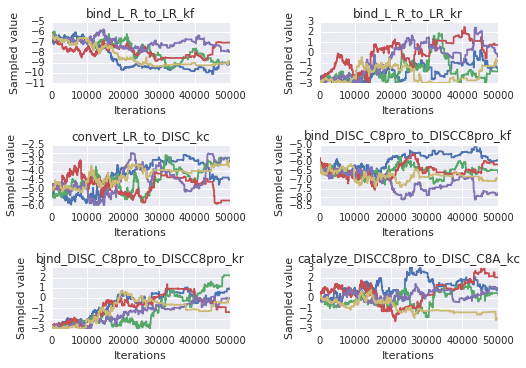

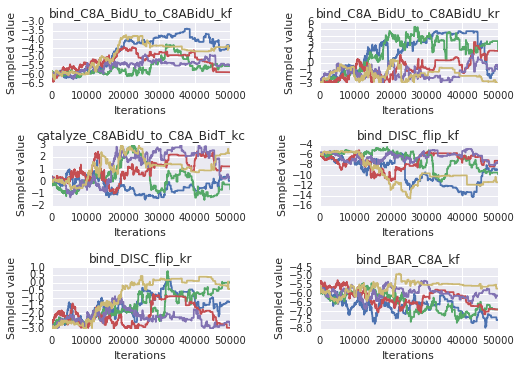

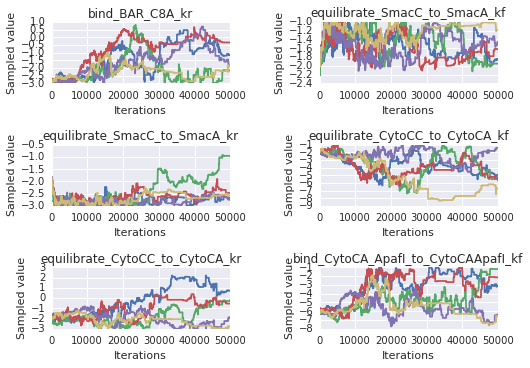

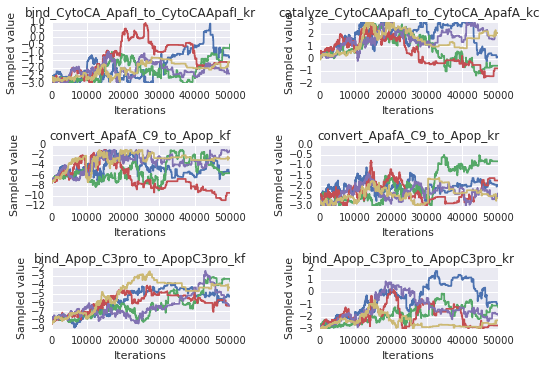

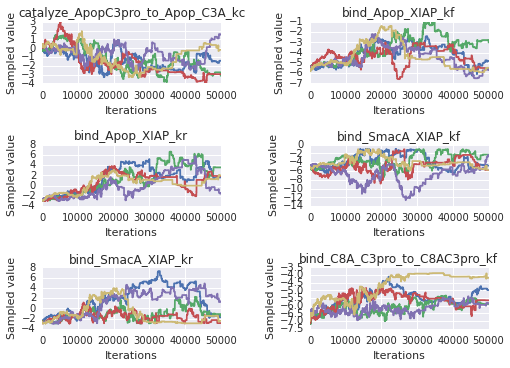

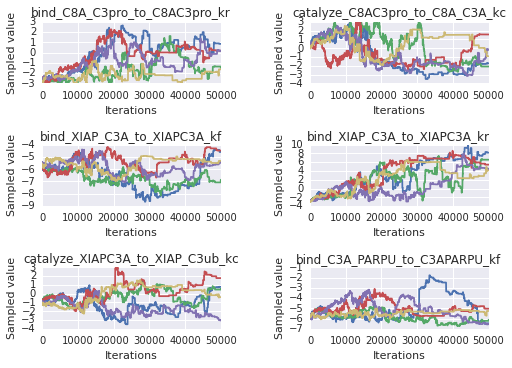

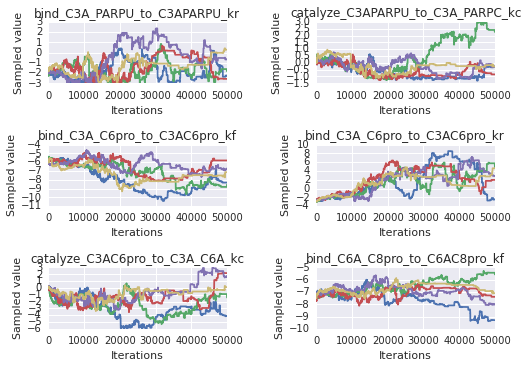

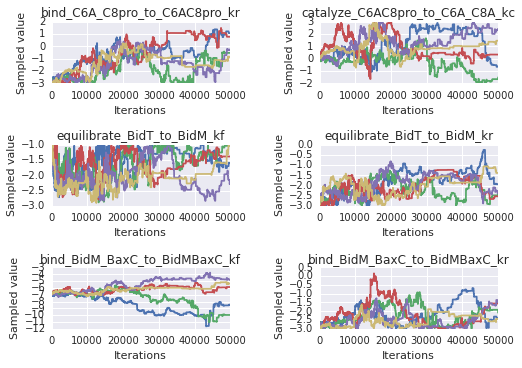

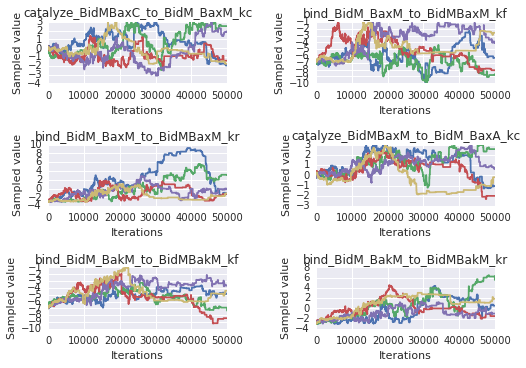

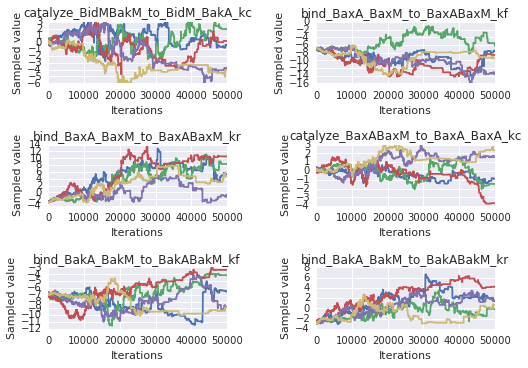

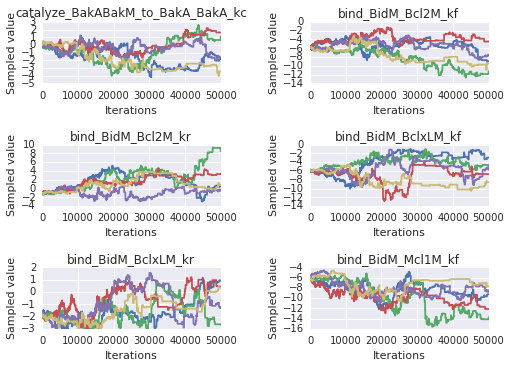

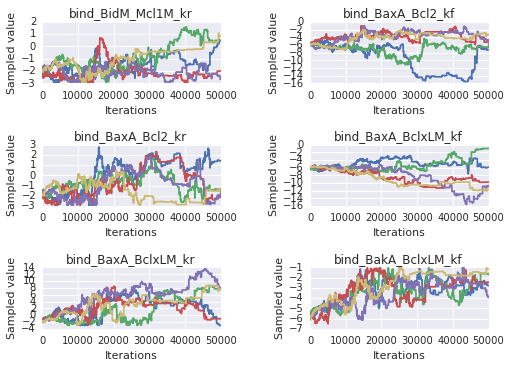

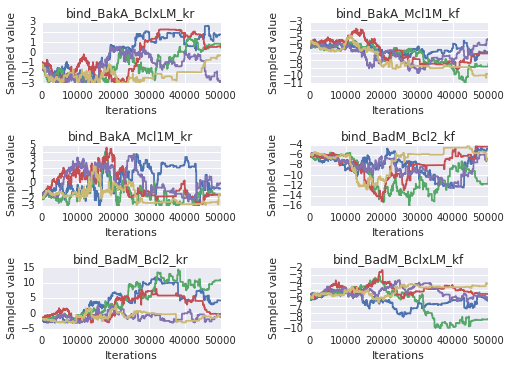

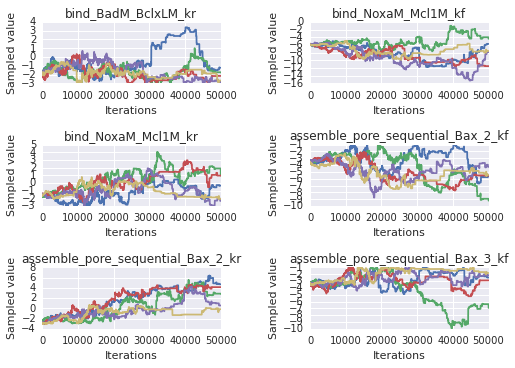

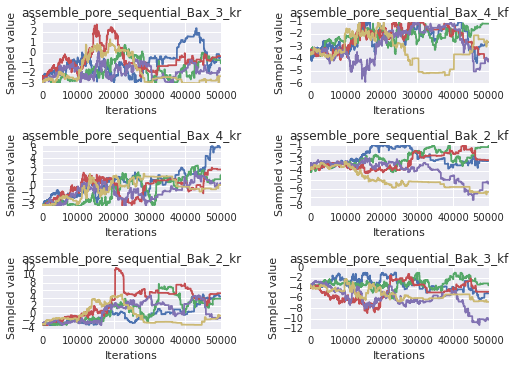

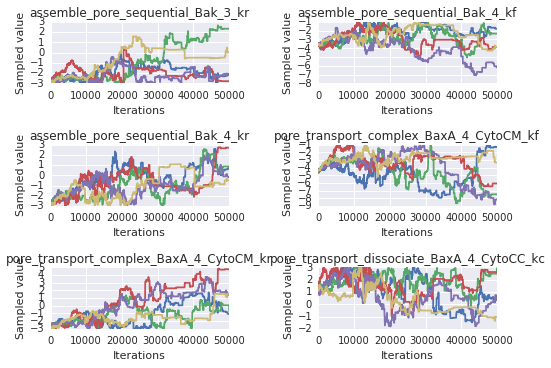

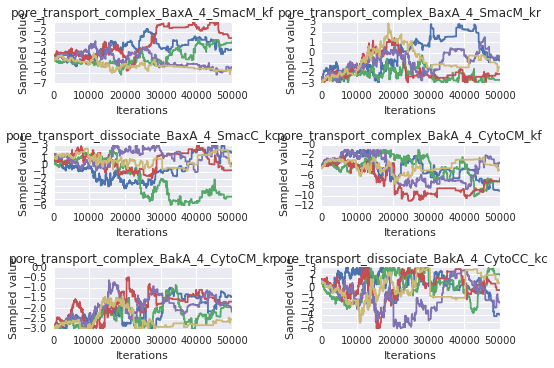

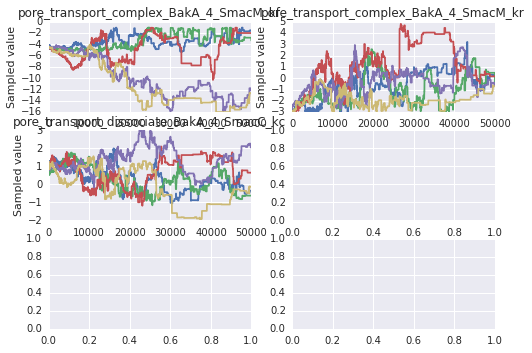

In [11]:
sample_plots(param_trace_dicts['a'])

In [12]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=45000, thin=1)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=45000, thin=1)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=45000, thin=1)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=45000, thin=1)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


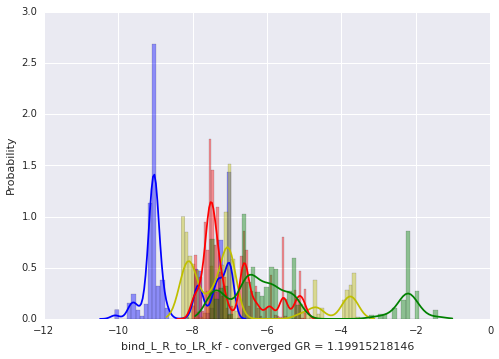

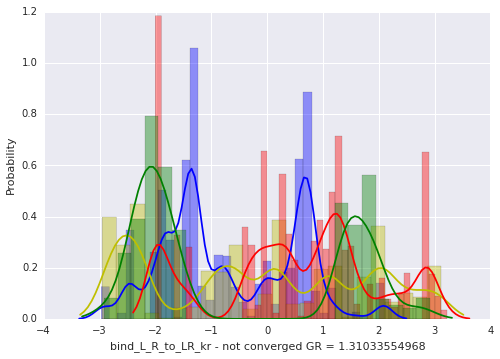

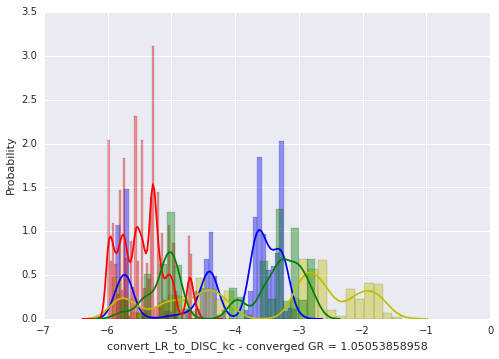

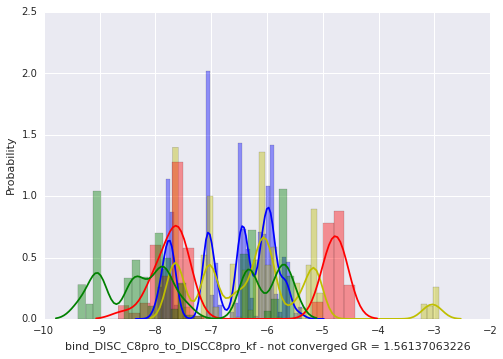

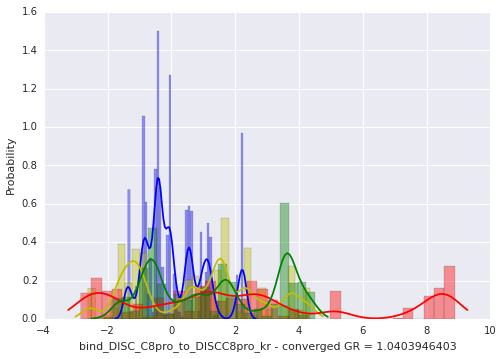

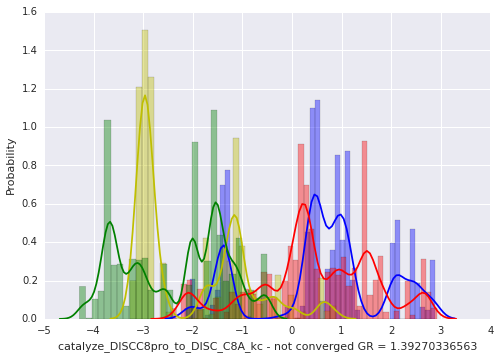

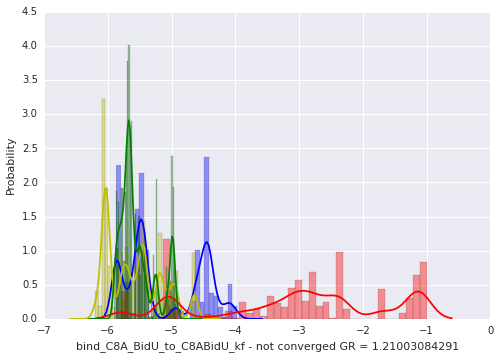

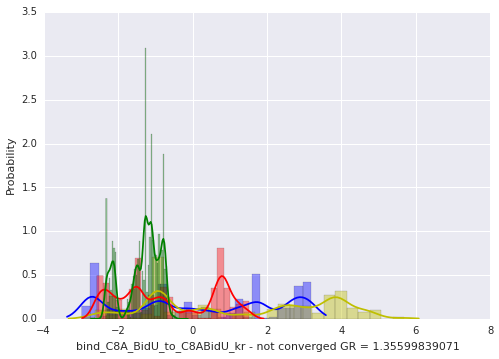

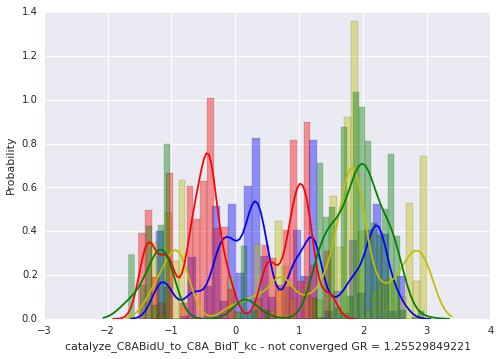

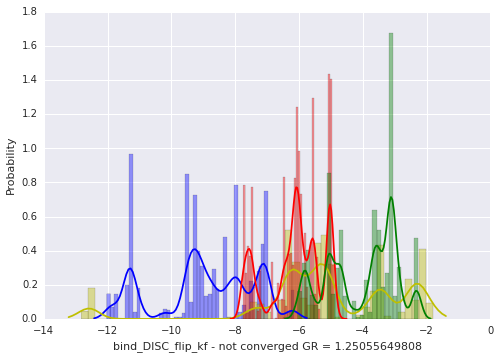

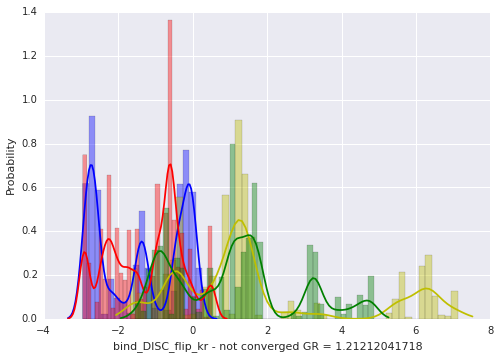

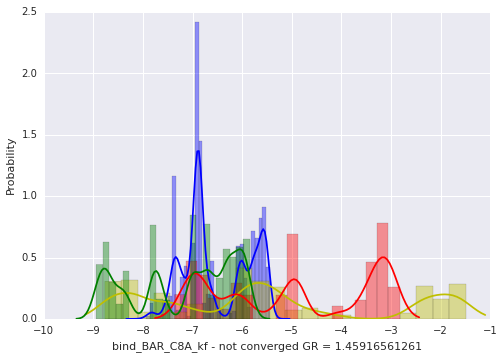

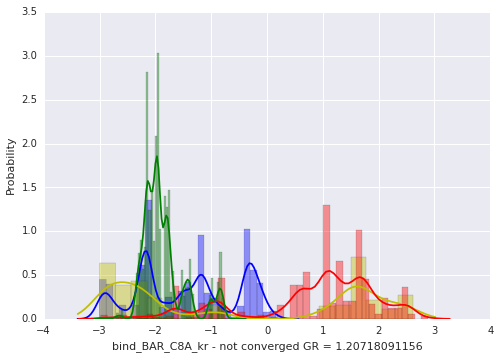

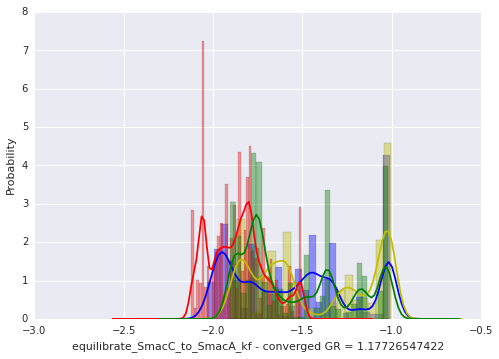

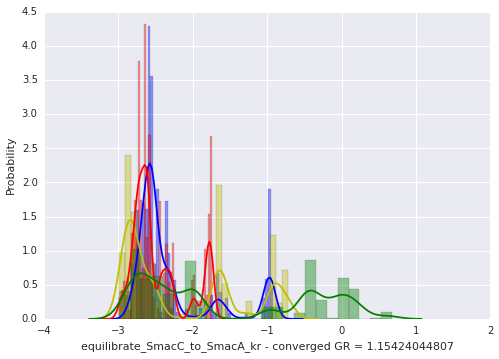

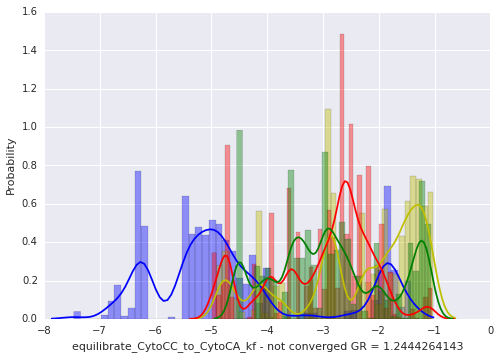

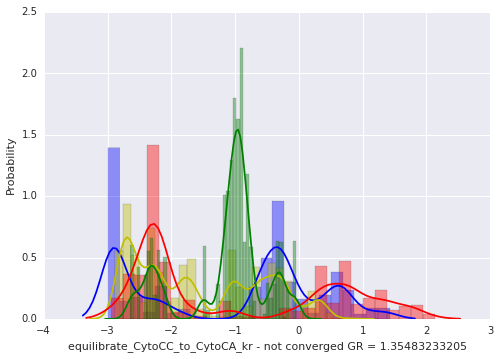

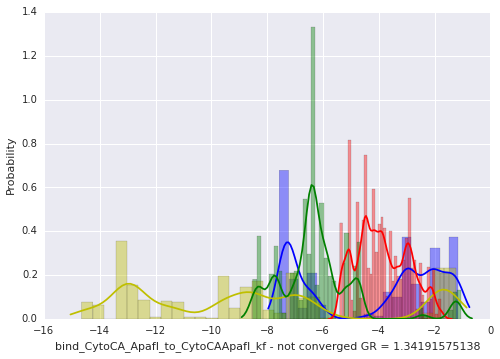

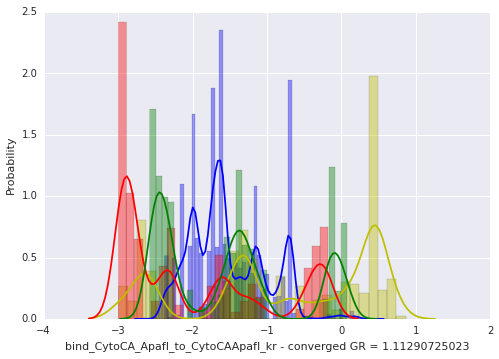

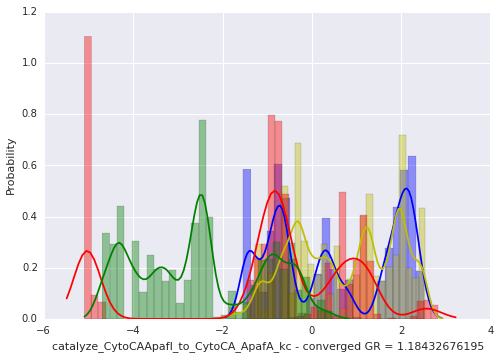

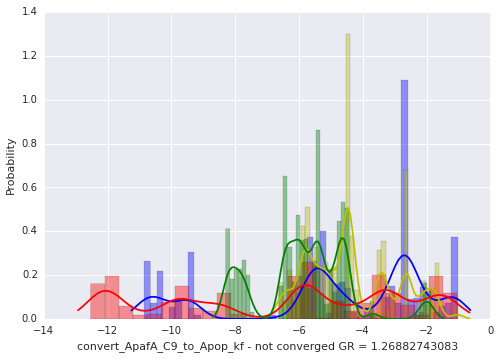

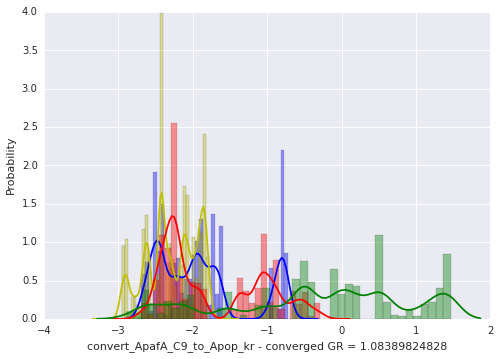

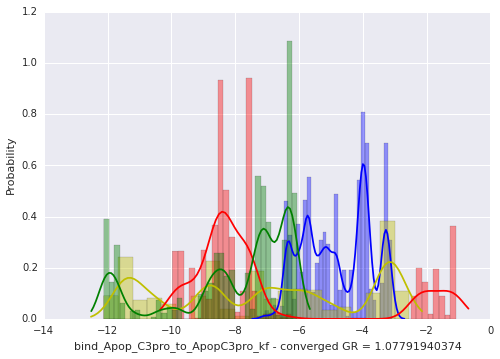

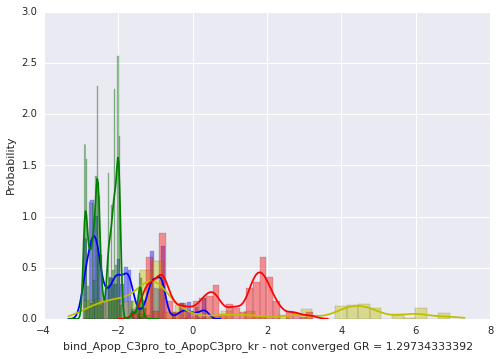

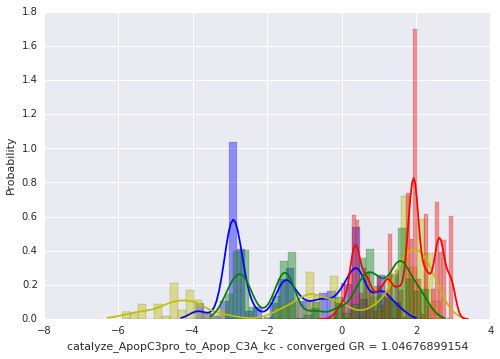

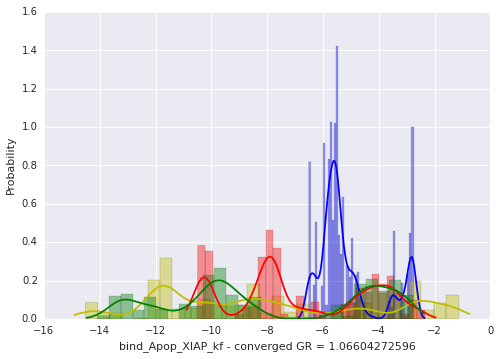

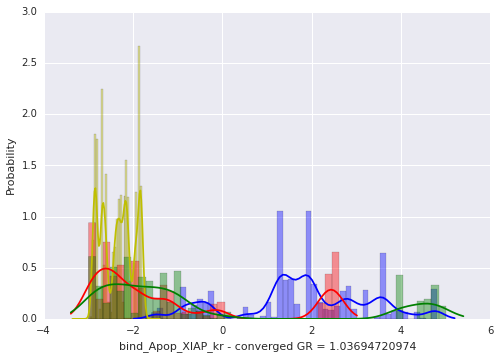

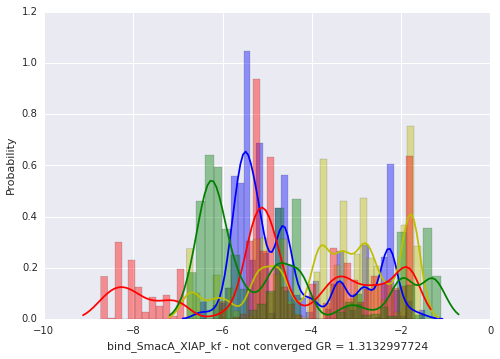

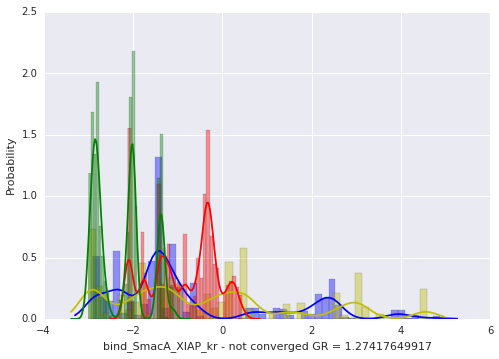

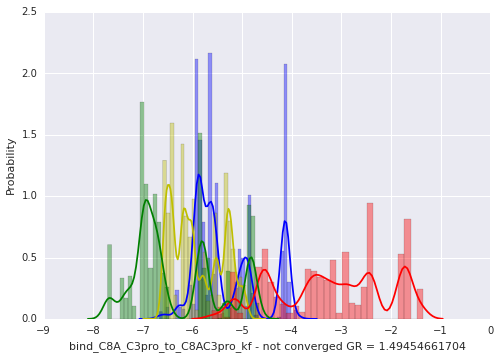

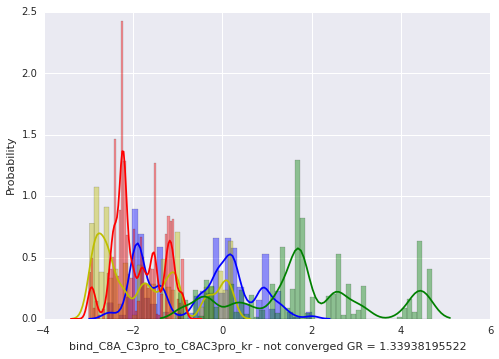

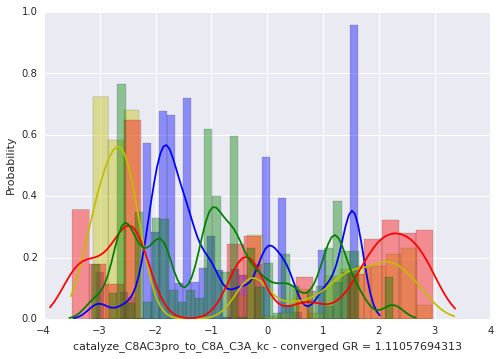

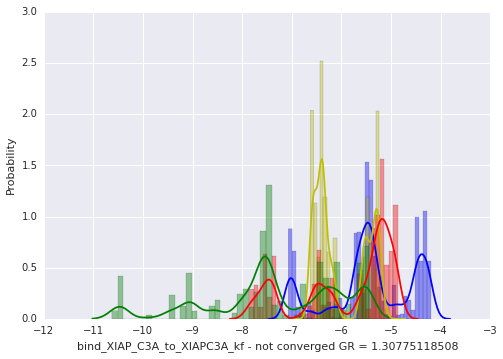

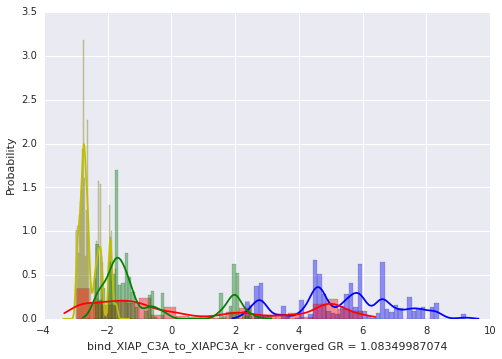

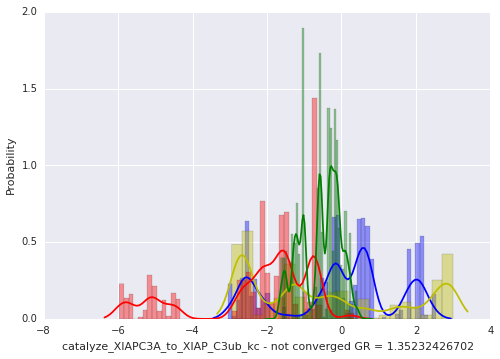

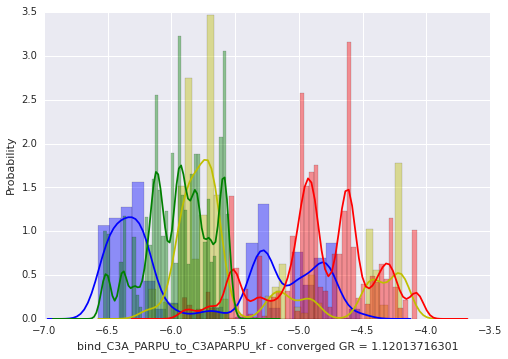

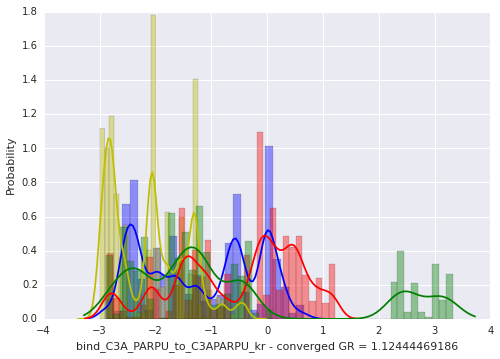

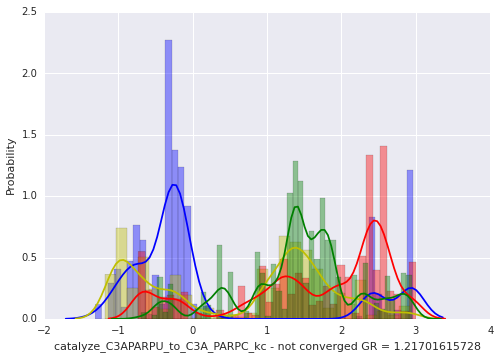

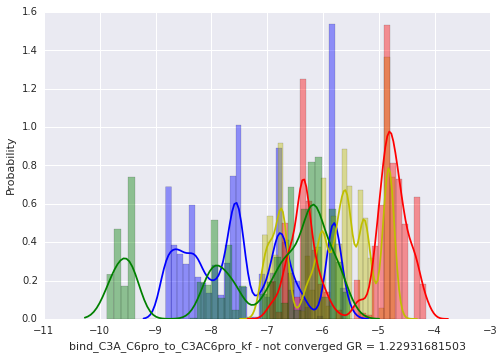

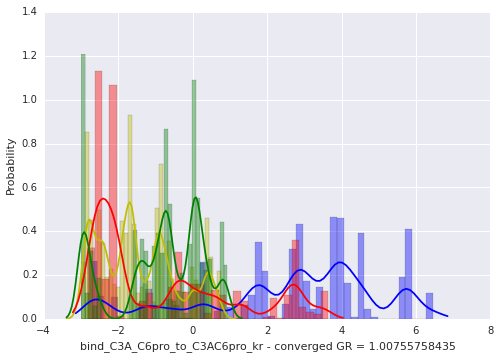

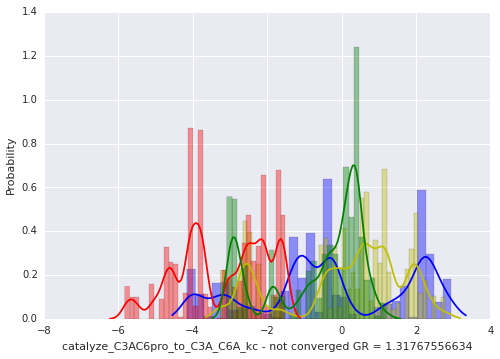

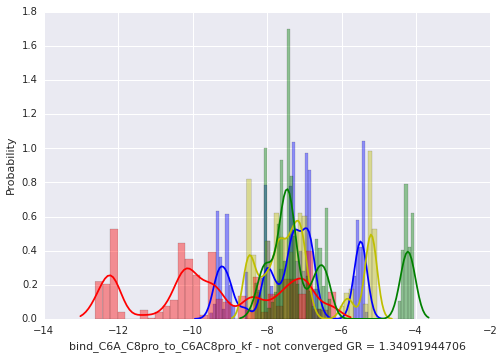

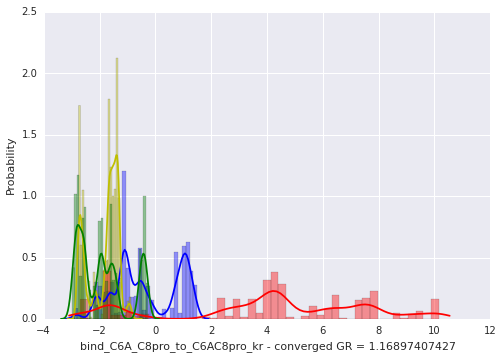

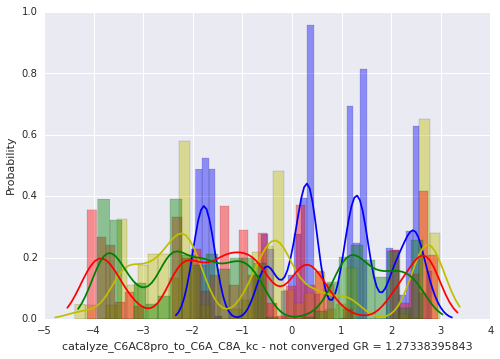

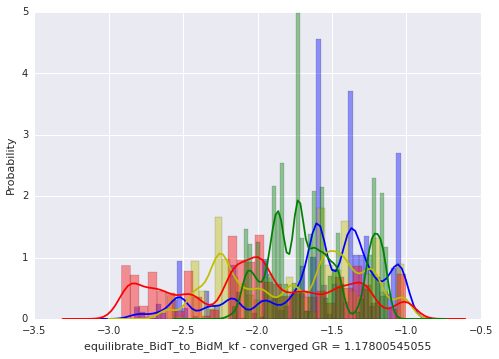

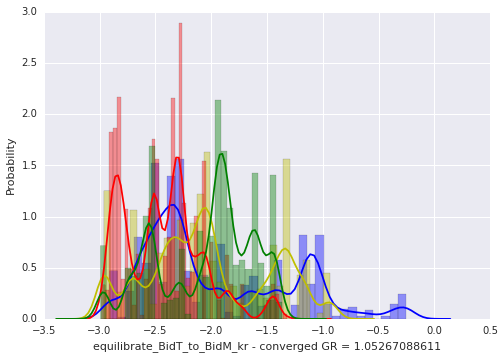

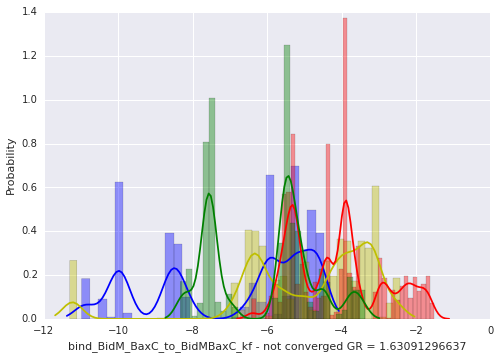

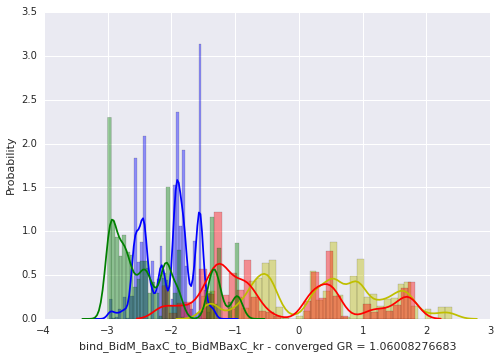

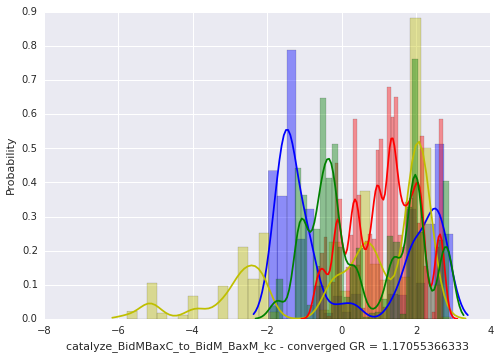

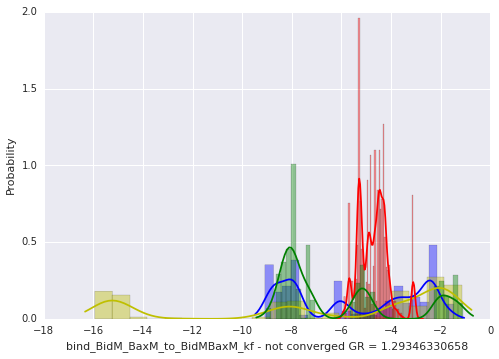

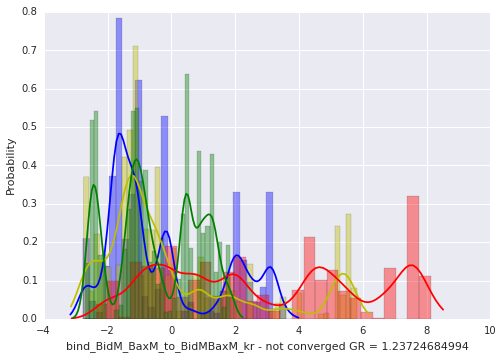

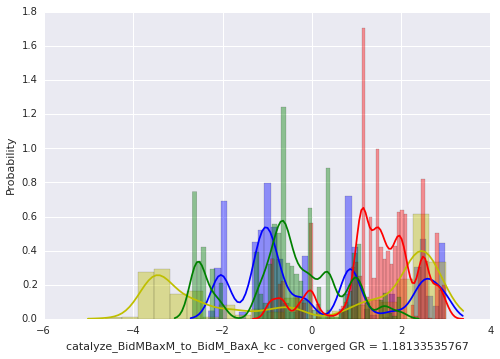

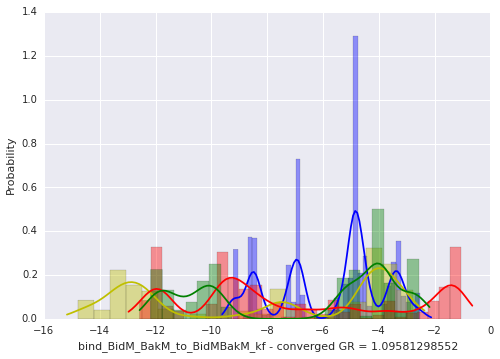

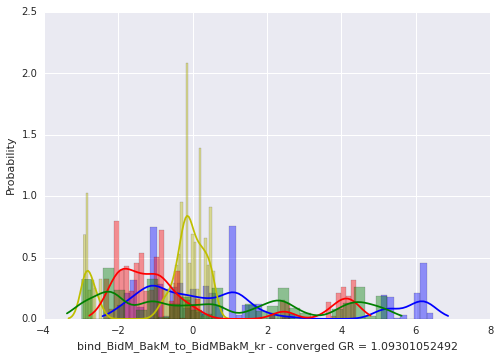

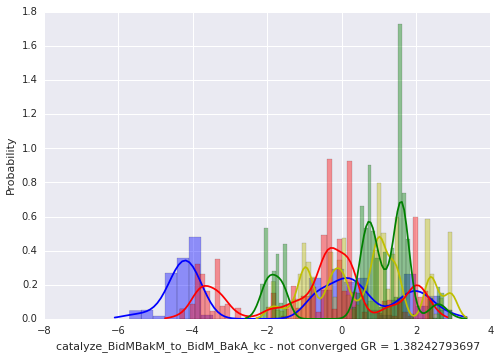

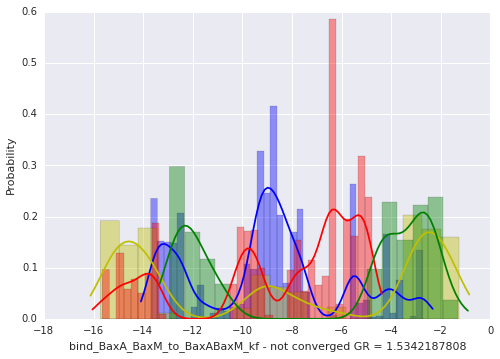

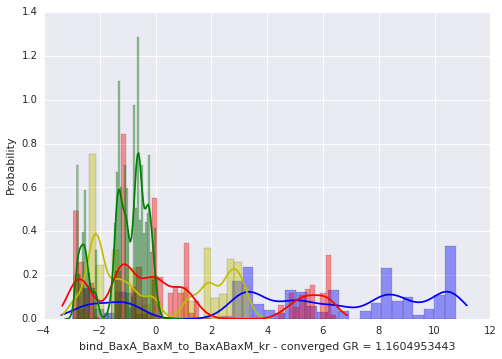

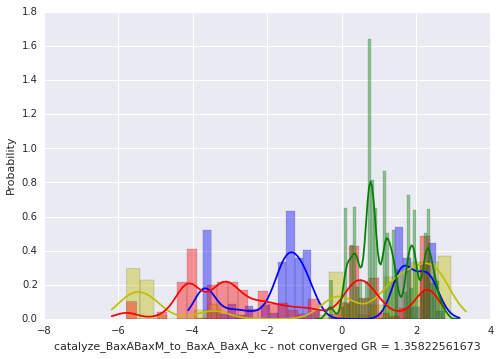

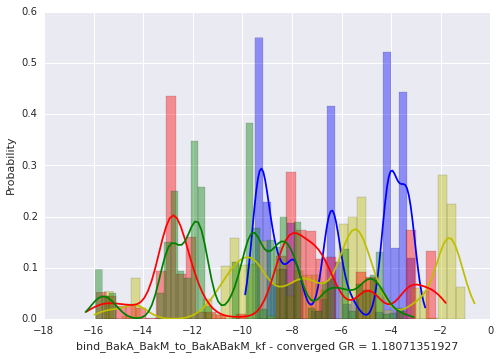

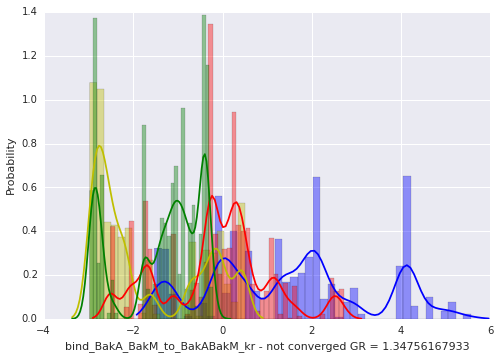

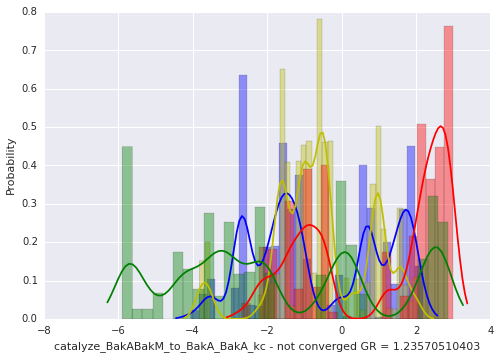

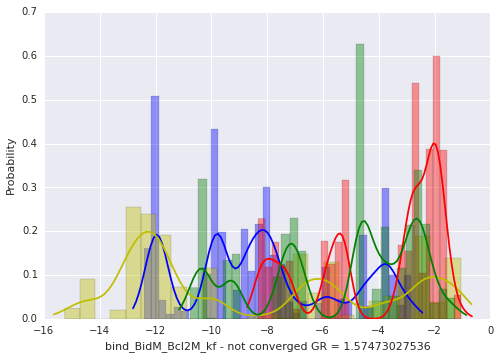

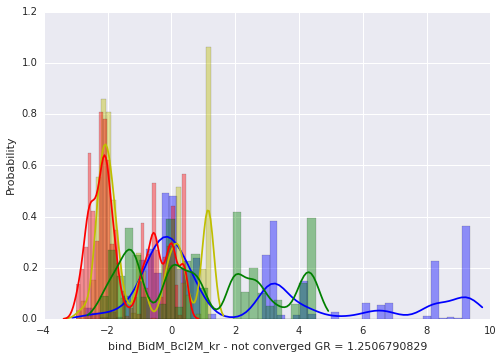

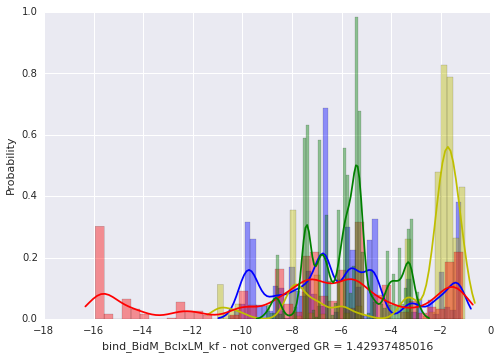

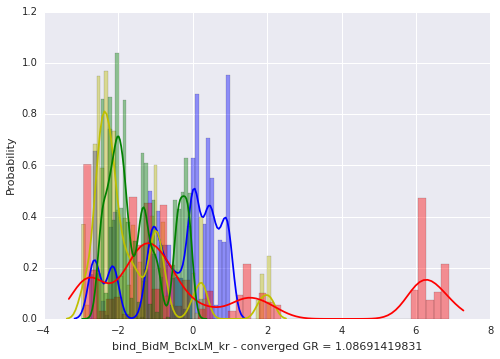

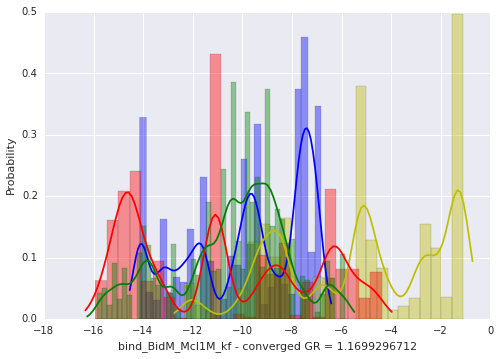

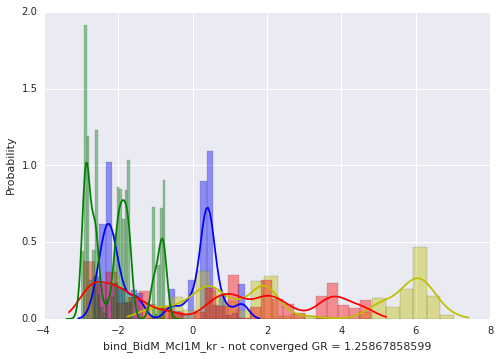

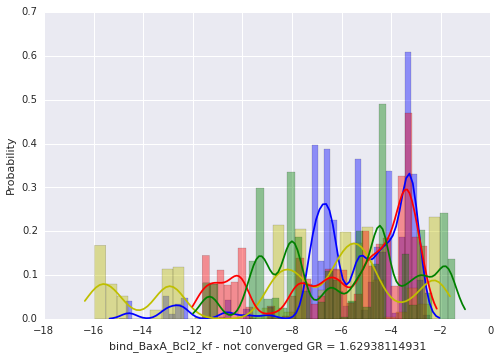

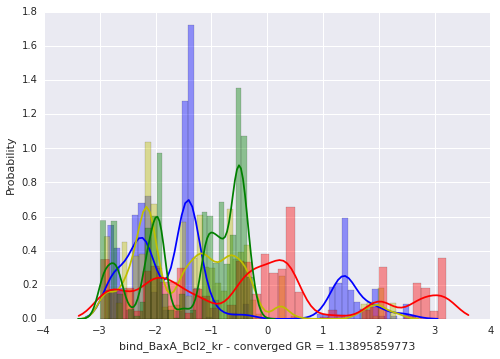

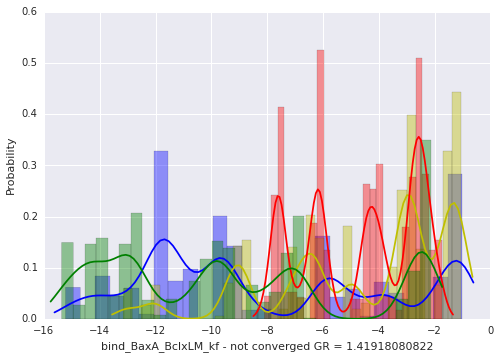

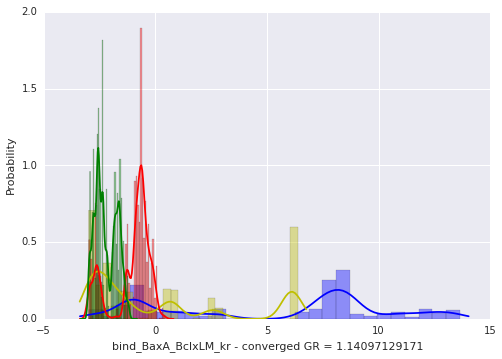

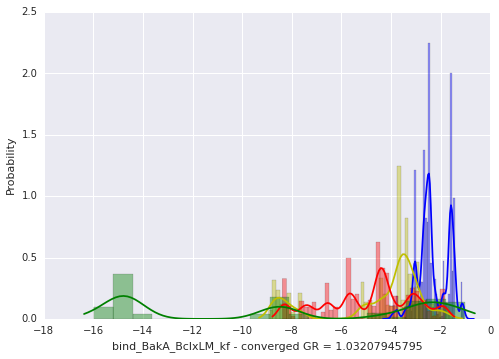

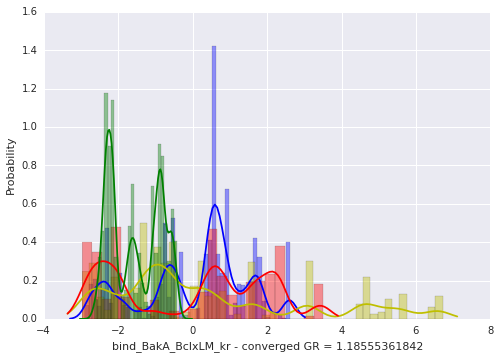

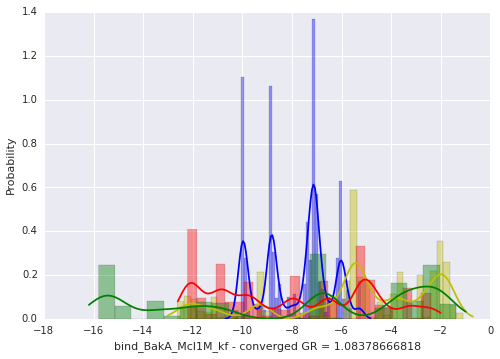

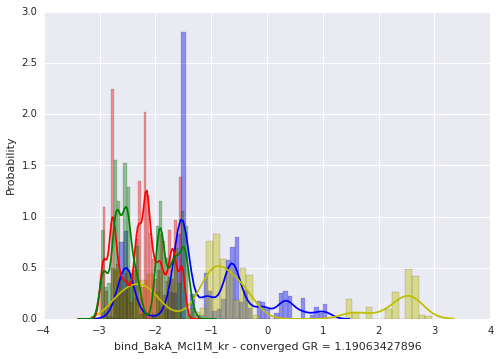

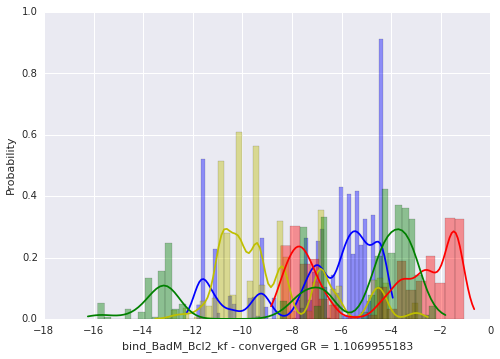

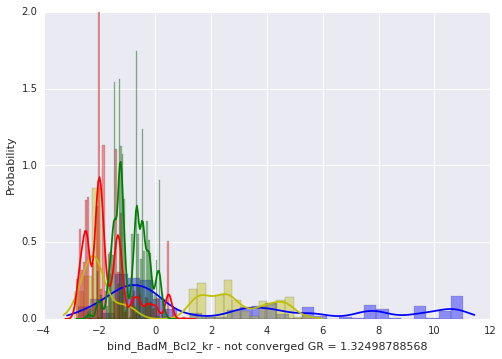

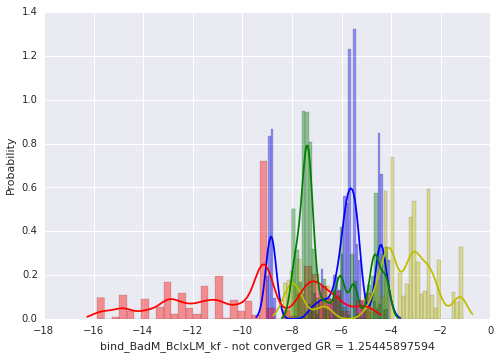

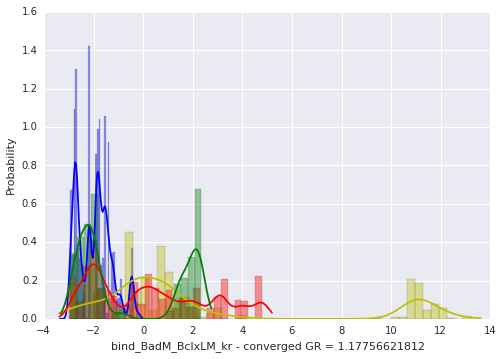

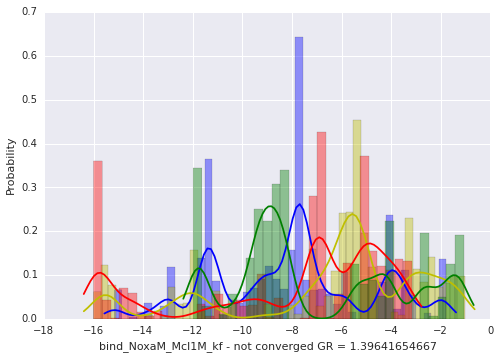

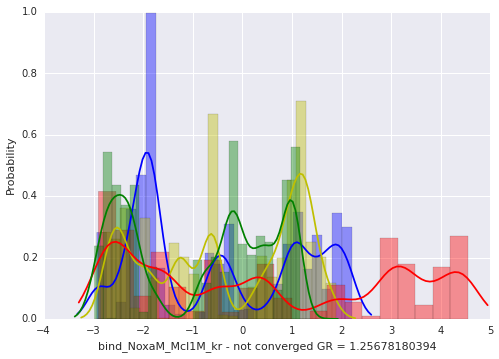

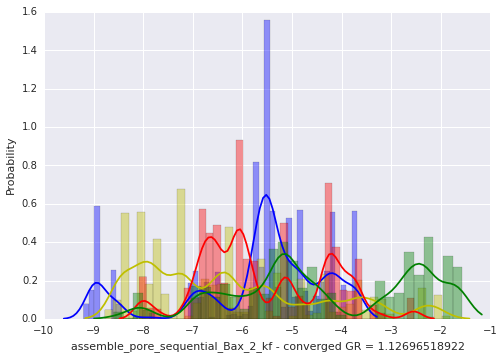

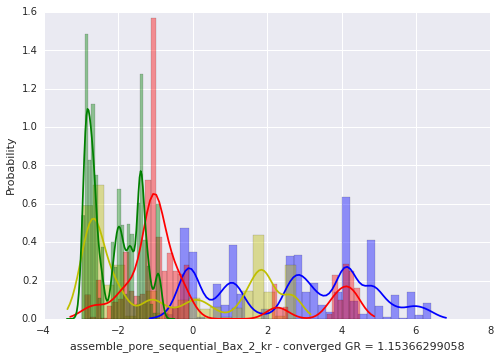

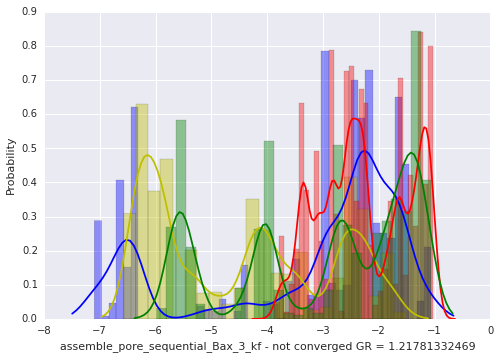

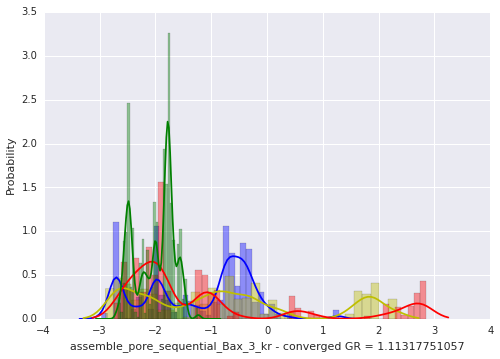

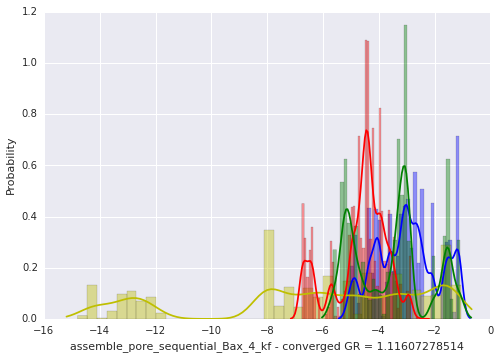

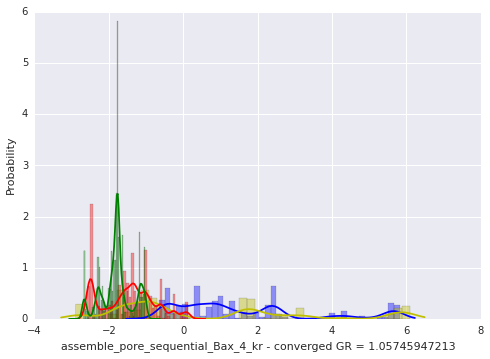

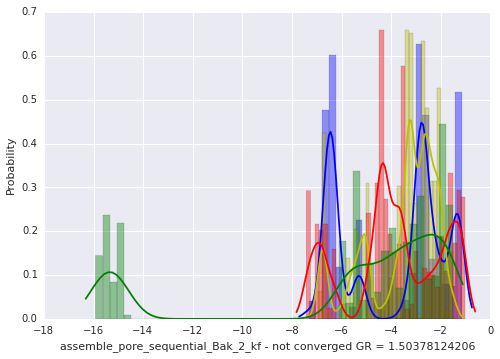

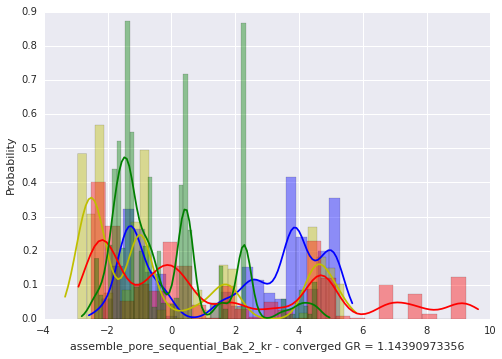

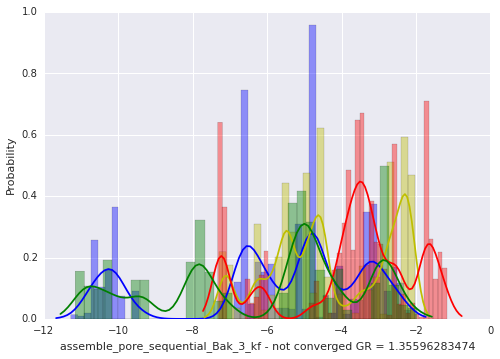

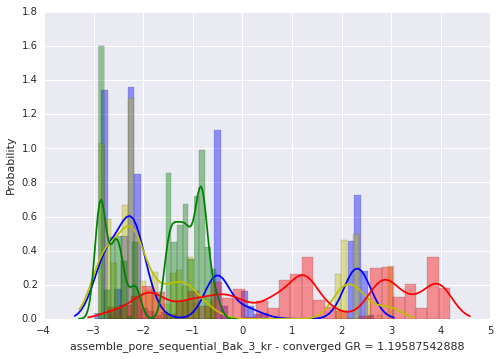

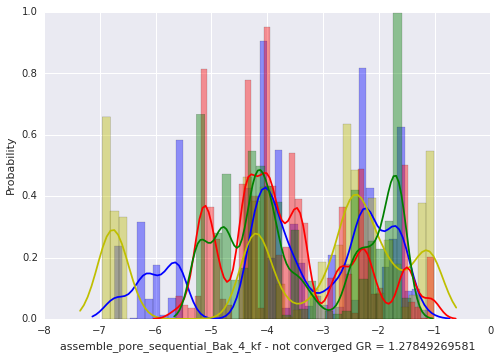

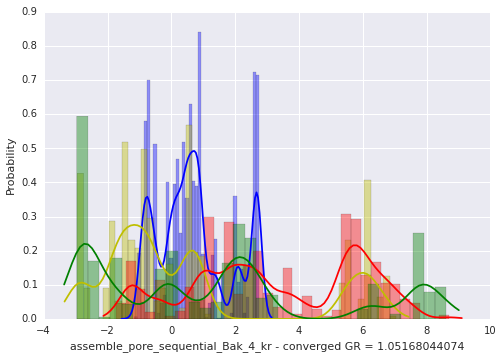

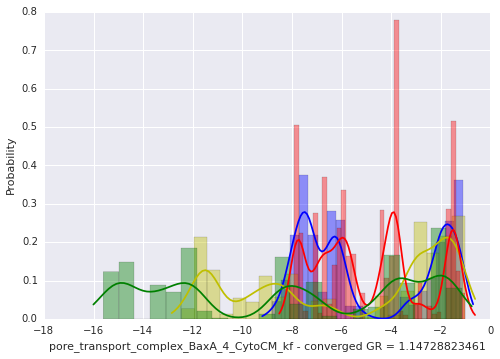

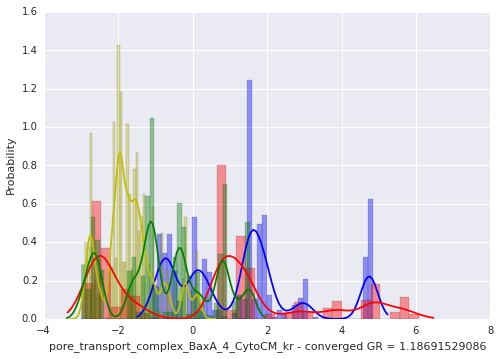

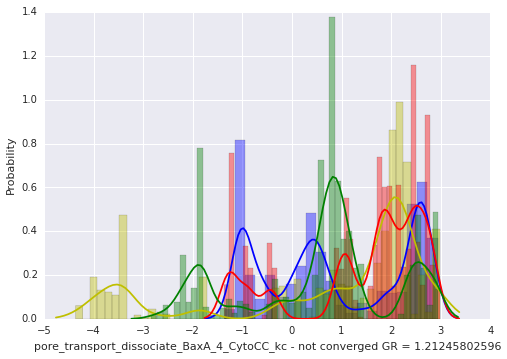

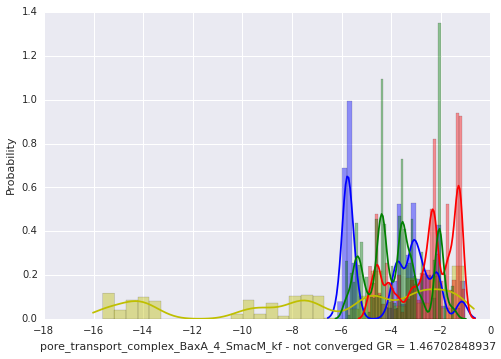

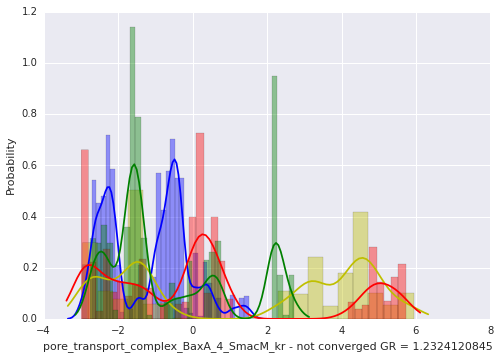

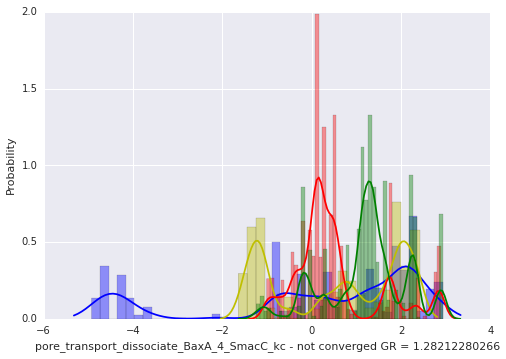

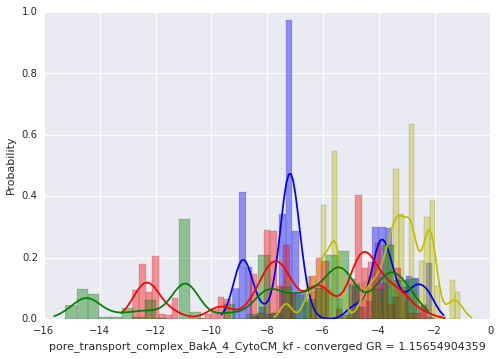

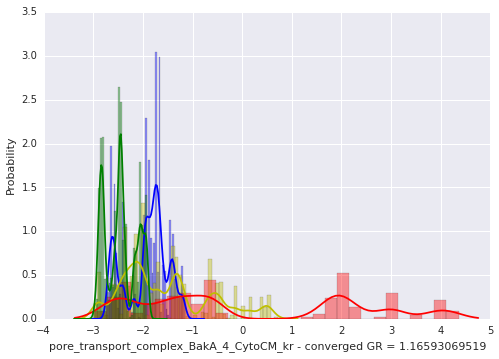

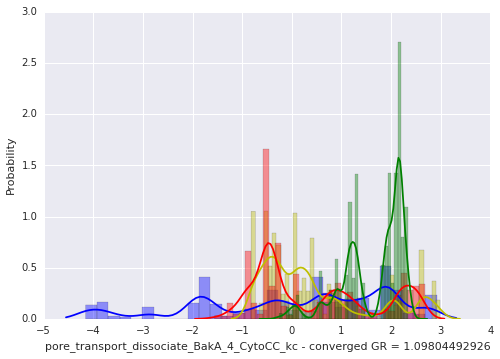

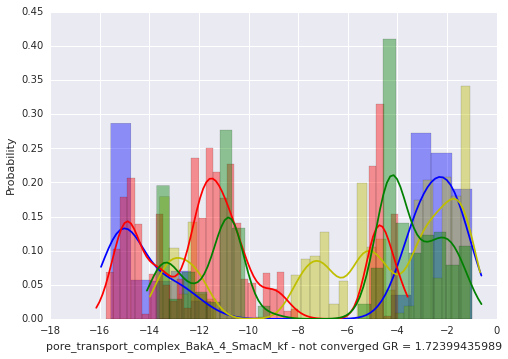

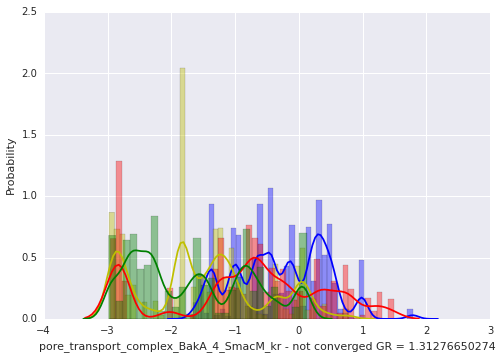

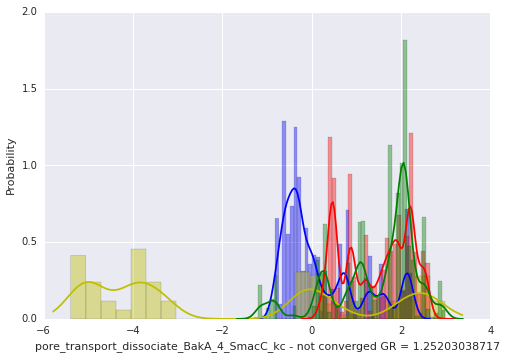

In [13]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    sns.distplot(trace_arr_b[:,dim], hist=True, color='y')
    sns.distplot(trace_arr_c[:,dim], hist=True, color='r')
    sns.distplot(trace_arr_d[:,dim], hist=True, color='g')
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

In [14]:
traces['a'][1][:,0]

array([-6.22627901, -6.22627901, -6.22627901, ..., -8.86398371,
       -8.86398371, -8.86398371])

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][0][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][1][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][2][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)

In [15]:
acceptance_rates = np.zeros((len(traces['a'][0][0],)))
for dim in range(len(traces['a'][0][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][0])):
        if traces['a'][0][iteration][dim] != traces['a'][0][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][0])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  985  acceptance rate:  0.0197
N acceptances for parameter:  bind_L_R_to_LR_kr  =  1025  acceptance rate:  0.0205
N acceptances for parameter:  convert_LR_to_DISC_kc  =  982  acceptance rate:  0.01964
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  970  acceptance rate:  0.0194
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  1045  acceptance rate:  0.0209
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  1055  acceptance rate:  0.0211
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  1037  acceptance rate:  0.02074
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  1006  acceptance rate:  0.02012
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  988  acceptance rate:  0.01976
N acceptances for parameter:  bind_DISC_flip_kf  =  1036  acceptance rate:  0.02072
N acceptances for parameter:  bind_DISC_flip_kr  =  1063  acceptance rate:  0.02126
N a

array([ 0.0197 ,  0.0205 ,  0.01964,  0.0194 ,  0.0209 ,  0.0211 ,
        0.02074,  0.02012,  0.01976,  0.02072,  0.02126,  0.0206 ,
        0.02024,  0.02028,  0.02054,  0.02116,  0.02114,  0.02084,
        0.02094,  0.02066,  0.02064,  0.02054,  0.02116,  0.02126,
        0.0207 ,  0.02048,  0.02088,  0.0205 ,  0.02076,  0.01956,
        0.02044,  0.02044,  0.02008,  0.02072,  0.02108,  0.02034,
        0.02072,  0.02072,  0.02048,  0.02084,  0.02088,  0.02034,
        0.02052,  0.02086,  0.0205 ,  0.02066,  0.02066,  0.02094,
        0.02068,  0.02136,  0.0206 ,  0.0208 ,  0.02004,  0.021  ,
        0.02008,  0.02082,  0.02076,  0.0207 ,  0.02068,  0.02042,
        0.02046,  0.02078,  0.02114,  0.02072,  0.02066,  0.02088,
        0.0208 ,  0.02072,  0.02128,  0.0205 ,  0.02076,  0.0207 ,
        0.02022,  0.02094,  0.02116,  0.021  ,  0.0208 ,  0.02062,
        0.02072,  0.02074,  0.0206 ,  0.02056,  0.02058,  0.02094,
        0.0206 ,  0.02084,  0.02054,  0.02098,  0.02022,  0.02

In [16]:
acceptance_rates = np.zeros((len(traces['a'][1][0],)))
for dim in range(len(traces['a'][1][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][1])):
        if traces['a'][1][iteration][dim] != traces['a'][1][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][1])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  967  acceptance rate:  0.01934
N acceptances for parameter:  bind_L_R_to_LR_kr  =  1030  acceptance rate:  0.0206
N acceptances for parameter:  convert_LR_to_DISC_kc  =  958  acceptance rate:  0.01916
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  986  acceptance rate:  0.01972
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  1044  acceptance rate:  0.02088
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  1002  acceptance rate:  0.02004
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  1017  acceptance rate:  0.02034
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  994  acceptance rate:  0.01988
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  1003  acceptance rate:  0.02006
N acceptances for parameter:  bind_DISC_flip_kf  =  1006  acceptance rate:  0.02012
N acceptances for parameter:  bind_DISC_flip_kr  =  1029  acceptance rate:  0.02058

array([ 0.01934,  0.0206 ,  0.01916,  0.01972,  0.02088,  0.02004,
        0.02034,  0.01988,  0.02006,  0.02012,  0.02058,  0.01934,
        0.0205 ,  0.02042,  0.01996,  0.02066,  0.02034,  0.02034,
        0.02028,  0.0205 ,  0.02026,  0.02066,  0.02018,  0.02036,
        0.0203 ,  0.02034,  0.02072,  0.02018,  0.02066,  0.01942,
        0.02018,  0.0201 ,  0.01996,  0.02054,  0.02016,  0.01932,
        0.0203 ,  0.02022,  0.01942,  0.02052,  0.01992,  0.01956,
        0.02022,  0.02056,  0.0204 ,  0.02038,  0.02056,  0.02044,
        0.0207 ,  0.0197 ,  0.02068,  0.02092,  0.01934,  0.02048,
        0.0205 ,  0.02   ,  0.02062,  0.0202 ,  0.02032,  0.02056,
        0.02046,  0.02022,  0.02006,  0.02002,  0.02054,  0.02002,
        0.02002,  0.02014,  0.02042,  0.02   ,  0.02022,  0.02014,
        0.02044,  0.02018,  0.02028,  0.0202 ,  0.01996,  0.02002,
        0.02048,  0.0205 ,  0.01992,  0.02028,  0.02042,  0.02046,
        0.01998,  0.02058,  0.02018,  0.02068,  0.02062,  0.02

In [17]:
acceptance_rates = np.zeros((len(traces['a'][2][0],)))
for dim in range(len(traces['a'][2][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][2])):
        if traces['a'][2][iteration][dim] != traces['a'][2][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][2])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  937  acceptance rate:  0.01874
N acceptances for parameter:  bind_L_R_to_LR_kr  =  1015  acceptance rate:  0.0203
N acceptances for parameter:  convert_LR_to_DISC_kc  =  953  acceptance rate:  0.01906
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  957  acceptance rate:  0.01914
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  1010  acceptance rate:  0.0202
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  1053  acceptance rate:  0.02106
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  960  acceptance rate:  0.0192
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  1002  acceptance rate:  0.02004
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  1004  acceptance rate:  0.02008
N acceptances for parameter:  bind_DISC_flip_kf  =  1008  acceptance rate:  0.02016
N acceptances for parameter:  bind_DISC_flip_kr  =  1014  acceptance rate:  0.02028
N

array([ 0.01874,  0.0203 ,  0.01906,  0.01914,  0.0202 ,  0.02106,
        0.0192 ,  0.02004,  0.02008,  0.02016,  0.02028,  0.01966,
        0.01998,  0.0201 ,  0.01984,  0.02036,  0.02028,  0.02046,
        0.02022,  0.01994,  0.0199 ,  0.02014,  0.0203 ,  0.02028,
        0.02012,  0.02008,  0.02006,  0.01974,  0.01998,  0.01912,
        0.01974,  0.01954,  0.01964,  0.01972,  0.01998,  0.01918,
        0.02026,  0.0198 ,  0.01978,  0.0203 ,  0.02   ,  0.0197 ,
        0.02084,  0.01998,  0.02004,  0.01958,  0.02014,  0.0206 ,
        0.0202 ,  0.0201 ,  0.0203 ,  0.02092,  0.02002,  0.02016,
        0.02022,  0.02034,  0.01996,  0.01988,  0.02004,  0.01962,
        0.02   ,  0.01944,  0.01914,  0.02016,  0.02064,  0.02   ,
        0.02002,  0.02014,  0.02048,  0.01964,  0.0204 ,  0.02062,
        0.0199 ,  0.01998,  0.01988,  0.01988,  0.0202 ,  0.02014,
        0.01984,  0.0202 ,  0.02038,  0.01978,  0.0202 ,  0.02016,
        0.02054,  0.0201 ,  0.01986,  0.02056,  0.0197 ,  0.02

In [18]:
acceptance_rates = np.zeros((len(traces['b'][3][0],)))
for dim in range(len(traces['a'][2][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['b'][0])):
        if traces['a'][2][iteration][dim] != traces['a'][2][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['b'][0])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  937  acceptance rate:  0.01874
N acceptances for parameter:  bind_L_R_to_LR_kr  =  1015  acceptance rate:  0.0203
N acceptances for parameter:  convert_LR_to_DISC_kc  =  953  acceptance rate:  0.01906
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  957  acceptance rate:  0.01914
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  1010  acceptance rate:  0.0202
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  1053  acceptance rate:  0.02106
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  960  acceptance rate:  0.0192
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  1002  acceptance rate:  0.02004
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  1004  acceptance rate:  0.02008
N acceptances for parameter:  bind_DISC_flip_kf  =  1008  acceptance rate:  0.02016
N acceptances for parameter:  bind_DISC_flip_kr  =  1014  acceptance rate:  0.02028
N

array([ 0.01874,  0.0203 ,  0.01906,  0.01914,  0.0202 ,  0.02106,
        0.0192 ,  0.02004,  0.02008,  0.02016,  0.02028,  0.01966,
        0.01998,  0.0201 ,  0.01984,  0.02036,  0.02028,  0.02046,
        0.02022,  0.01994,  0.0199 ,  0.02014,  0.0203 ,  0.02028,
        0.02012,  0.02008,  0.02006,  0.01974,  0.01998,  0.01912,
        0.01974,  0.01954,  0.01964,  0.01972,  0.01998,  0.01918,
        0.02026,  0.0198 ,  0.01978,  0.0203 ,  0.02   ,  0.0197 ,
        0.02084,  0.01998,  0.02004,  0.01958,  0.02014,  0.0206 ,
        0.0202 ,  0.0201 ,  0.0203 ,  0.02092,  0.02002,  0.02016,
        0.02022,  0.02034,  0.01996,  0.01988,  0.02004,  0.01962,
        0.02   ,  0.01944,  0.01914,  0.02016,  0.02064,  0.02   ,
        0.02002,  0.02014,  0.02048,  0.01964,  0.0204 ,  0.02062,
        0.0199 ,  0.01998,  0.01988,  0.01988,  0.0202 ,  0.02014,
        0.01984,  0.0202 ,  0.02038,  0.01978,  0.0202 ,  0.02016,
        0.02054,  0.0201 ,  0.01986,  0.02056,  0.0197 ,  0.02

In [19]:
acceptance_rates = np.zeros((len(traces['b'][4][0],)))
for dim in range(len(traces['a'][2][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['b'][0])):
        if traces['a'][2][iteration][dim] != traces['a'][2][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['b'][0])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  937  acceptance rate:  0.01874
N acceptances for parameter:  bind_L_R_to_LR_kr  =  1015  acceptance rate:  0.0203
N acceptances for parameter:  convert_LR_to_DISC_kc  =  953  acceptance rate:  0.01906
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  957  acceptance rate:  0.01914
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  1010  acceptance rate:  0.0202
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  1053  acceptance rate:  0.02106
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  960  acceptance rate:  0.0192
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  1002  acceptance rate:  0.02004
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  1004  acceptance rate:  0.02008
N acceptances for parameter:  bind_DISC_flip_kf  =  1008  acceptance rate:  0.02016
N acceptances for parameter:  bind_DISC_flip_kr  =  1014  acceptance rate:  0.02028
N

array([ 0.01874,  0.0203 ,  0.01906,  0.01914,  0.0202 ,  0.02106,
        0.0192 ,  0.02004,  0.02008,  0.02016,  0.02028,  0.01966,
        0.01998,  0.0201 ,  0.01984,  0.02036,  0.02028,  0.02046,
        0.02022,  0.01994,  0.0199 ,  0.02014,  0.0203 ,  0.02028,
        0.02012,  0.02008,  0.02006,  0.01974,  0.01998,  0.01912,
        0.01974,  0.01954,  0.01964,  0.01972,  0.01998,  0.01918,
        0.02026,  0.0198 ,  0.01978,  0.0203 ,  0.02   ,  0.0197 ,
        0.02084,  0.01998,  0.02004,  0.01958,  0.02014,  0.0206 ,
        0.0202 ,  0.0201 ,  0.0203 ,  0.02092,  0.02002,  0.02016,
        0.02022,  0.02034,  0.01996,  0.01988,  0.02004,  0.01962,
        0.02   ,  0.01944,  0.01914,  0.02016,  0.02064,  0.02   ,
        0.02002,  0.02014,  0.02048,  0.01964,  0.0204 ,  0.02062,
        0.0199 ,  0.01998,  0.01988,  0.01988,  0.0202 ,  0.02014,
        0.01984,  0.0202 ,  0.02038,  0.01978,  0.0202 ,  0.02016,
        0.02054,  0.0201 ,  0.01986,  0.02056,  0.0197 ,  0.02